<a href="https://colab.research.google.com/github/Lihini827/speech-emotion-hybridLSTM-RNn-gradcam/blob/main/_speechEmotionVIT_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pip install method (recommended)
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.2.57 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/201.2 GB disk)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="uRg1alqSD7dk8lBMRRko")
project = rf.workspace("sliit-vylmb").project("jellyfish-l2rea")
dataset = project.version(1).download("folder")


  Obtaining dependency information for roboflow from https://files.pythonhosted.org/packages/95/da/72fda7a49ec81e369654eb6cfa733ec6e1ee87a7d1ed6a154c4cf6bf9c1d/roboflow-1.1.12-py3-none-any.whl.metadata
  Obtaining dependency information for certifi==2023.7.22 from https://files.pythonhosted.org/packages/4c/dd/2234eab22353ffc7d94e8d13177aaa050113286e93e7b40eae01fbf7c3d9/certifi-2023.7.22-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 4.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
  Obtaining dependency information for opencv-python-headless==4.8.0.74 from https://files.pythonhosted.org/packages/76/02/f128517f3ade4bb5f71e2afd8461dba70e3f466ce745fa1fd1fade9ad1b7/opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.2 MB/s eta 0:00:00
  Obtaining dependency information for supervision f

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Jellyfish-1 in folder:: 100%|██████████| 1002/1002 [00:00<00:00, 5878.91it/s]


In [ ]:
!pip install torch torchvision timm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.5 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import timm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **WORKING**

## https://www.kaggle.com/code/adhoppin/testing-vit-for-image-classification

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from transformers import ViTFeatureExtractor, ViTForImageClassification

# Define dataset paths
data_dir = "/content/drive/MyDrive/speech emotion/Melspectro"

# Define transformations for data preprocessing and augmentation
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create datasets and data loaders
train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=train_transform)
valid_dataset = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=val_test_transform)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=val_test_transform)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Load the pre-trained ViT model
model_name = "google/vit-base-patch16-224-in21k"
feature_extractor = ViTFeatureExtractor(model_name)
model = ViTForImageClassification.from_pretrained(model_name, num_labels=len(train_dataset.classes))

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001)  # Adjust learning rate

# Learning rate scheduler with warm-up
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001, total_steps=len(train_loader) * 20)

# Training loop
num_epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

best_validation_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation loop
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        validation_accuracy = 100 * correct / total

        # Save the model if validation accuracy improved
        if validation_accuracy > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy
            torch.save(model.state_dict(), "best_model.pth")

    print(f"Epoch [{epoch + 1}/{num_epochs}] "
          f"Loss: {running_loss / len(train_loader):.4f} "
          f"Validation Accuracy: {validation_accuracy:.2f}%")

    # Adjust learning rate
    scheduler.step()

# Load the best model for testing
model.load_state_dict(torch.load("best_model.pth"))

# Testing the model
model.eval()
test_correct = 0
test_total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.logits, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100 * test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.2f}%")

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch [1/20] Loss: 1.1070 Validation Accuracy: 98.93%
Epoch [2/20] Loss: 0.2952 Validation Accuracy: 99.64%
Epoch [3/20] Loss: 0.1495 Validation Accuracy: 99.64%
Epoch [4/20] Loss: 0.1077 Validation Accuracy: 99.64%
Epoch [5/20] Loss: 0.0855 Validation Accuracy: 99.64%
Epoch [6/20] Loss: 0.0702 Validation Accuracy: 99.64%
Epoch [7/20] Loss: 0.0588 Validation Accuracy: 99.64%
Epoch [8/20] Loss: 0.0498 Validation Accuracy: 99.64%
Epoch [9/20] Loss: 0.0426 Validation Accuracy: 99.64%
Epoch [10/20] Loss: 0.0368 Validation Accuracy: 99.64%
Epoch [11/20] Loss: 0.0320 Validation Accuracy: 99.64%
Epoch [12/20] Loss: 0.0281 Validation Accuracy: 99.64%
Epoch [13/20] Loss: 0.0247 Validation Accuracy: 99.64%
Epoch [14/20] Loss: 0.0219 Validation Accuracy: 99.64%
Epoch [15/20] Loss: 0.0195 Validation Accuracy: 99.64%
Epoch [16/20] Loss: 0.0174 Validation Accuracy: 99.64%
Epoch [17/20] Loss: 0.0156 Validation Accuracy: 99.64%
Epoch [18/20] Loss: 0.0140 Validation Accuracy: 99.64%
Epoch [19/20] Loss:

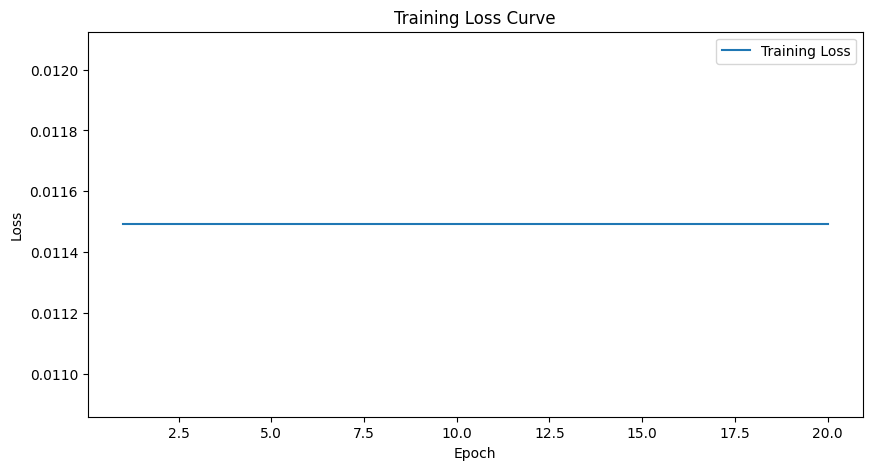

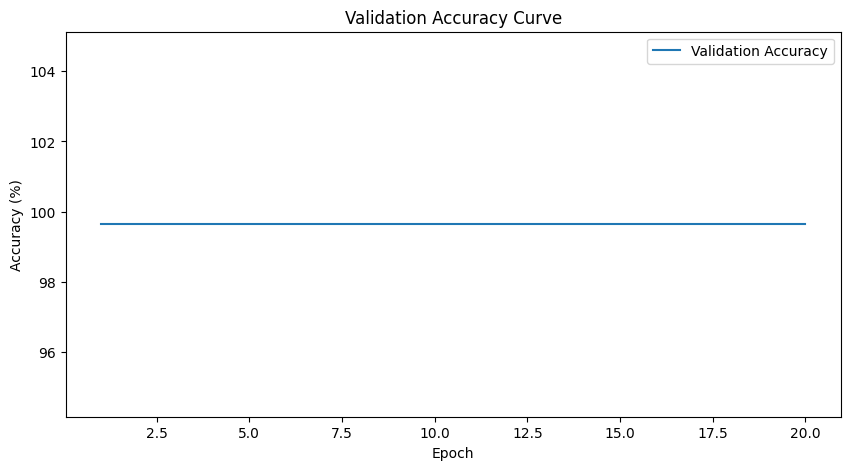

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ...

# Lists to store training loss and validation accuracy
train_loss_history = []
val_accuracy_history = []

# ...

for epoch in range(num_epochs):
    # ...

    # Append training loss to the list
    train_loss_history.append(running_loss / len(train_loader))

    # Validation loop
    # ...

    # Append validation accuracy to the list
    val_accuracy_history.append(validation_accuracy)

    # ...

# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, num_epochs + 1), train_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, num_epochs + 1), val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Curve')
plt.legend()
plt.show()


Classification Report:
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        82
     disgust       1.00      1.00      1.00        80
        fear       1.00      1.00      1.00        80
       happy       1.00      1.00      1.00        80
     neutral       1.00      1.00      1.00        81
         sad       1.00      1.00      1.00        80
    surprise       1.00      1.00      1.00        80

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563



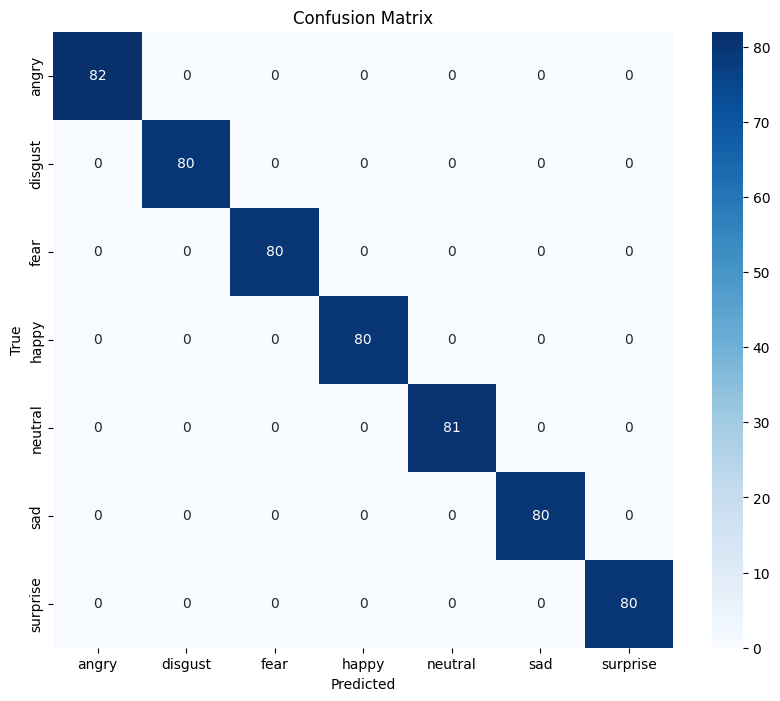

In [ ]:
# Lists to store predicted and true labels
all_predicted_labels = []
all_true_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.logits, 1)

        # Append predicted and true labels to the lists
        all_predicted_labels.extend(predicted.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Classification report
print("Classification Report:")
print(classification_report(all_true_labels, all_predicted_labels, target_names=test_dataset.classes))

# Confusion matrix
cm = confusion_matrix(all_true_labels, all_predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from transformers import ViTFeatureExtractor, ViTForImageClassification

# Define dataset paths
data_dir = "/content/drive/MyDrive/speech emotion/Melspectro"

# Define transformations for data preprocessing and augmentation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create datasets and data loaders
train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=train_transform)
valid_dataset = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=val_test_transform)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=val_test_transform)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Load the pre-trained ViT model
model_name = "google/vit-base-patch16-224-in21k"
feature_extractor = ViTFeatureExtractor(model_name)
model = ViTForImageClassification.from_pretrained(model_name, num_labels=len(train_dataset.classes))

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001)  # Adjust learning rate

# Learning rate scheduler with warm-up
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001, total_steps=len(train_loader) * 20)

# Training loop
num_epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

best_validation_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    val_running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        val_running_loss += loss.item()

    # Validation loop
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        validation_accuracy = 100 * correct / total

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total

        # Save the model if validation accuracy improved
        if validation_accuracy > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy
            torch.save(model.state_dict(), "best_model.pth")

    print(f"Epoch [{epoch + 1}/{num_epochs}] "
          f"Validation Loss: {val_running_loss / len(train_loader):.4f} "
        f"Training Loss: {running_loss / len(train_loader):.4f} "

          f"Validation Accuracy: {validation_accuracy:.2f}%"
         f"Training Accuracy: {train_accuracy:.2f}%")

    # Adjust learning rate
    scheduler.step()

# Load the best model for testing
model.load_state_dict(torch.load("best_model.pth"))

# Testing the model
model.eval()
test_correct = 0
test_total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.logits, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100 * test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.2f}%")

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch [1/20] Validation Loss: 0.1739 Training Loss: 1.5195 Validation Accuracy: 66.79%Training Accuracy: 56.71%
Epoch [2/20] Validation Loss: 0.0956 Training Loss: 1.0083 Validation Accuracy: 85.71%Training Accuracy: 72.40%
Epoch [3/20] Validation Loss: 0.0628 Training Loss: 0.7152 Validation Accuracy: 93.93%Training Accuracy: 77.35%
Epoch [4/20] Validation Loss: 0.0368 Training Loss: 0.5669 Validation Accuracy: 99.29%Training Accuracy: 87.52%
Epoch [5/20] Validation Loss: 0.0315 Training Loss: 0.4377 Validation Accuracy: 97.86%Training Accuracy: 84.75%
Epoch [6/20] Validation Loss: 0.0282 Training Loss: 0.4000 Validation Accuracy: 93.21%Training Accuracy: 83.55%
Epoch [7/20] Validation Loss: 0.0295 Training Loss: 0.4083 Validation Accuracy: 98.57%Training Accuracy: 79.05%
Epoch [8/20] Validation Loss: 0.0138 Training Loss: 0.3525 Validation Accuracy: 100.00%Training Accuracy: 89.30%
Epoch [9/20] Validation Loss: 0.0100 Training Loss: 0.3081 Validation Accuracy: 100.00%Training Accurac

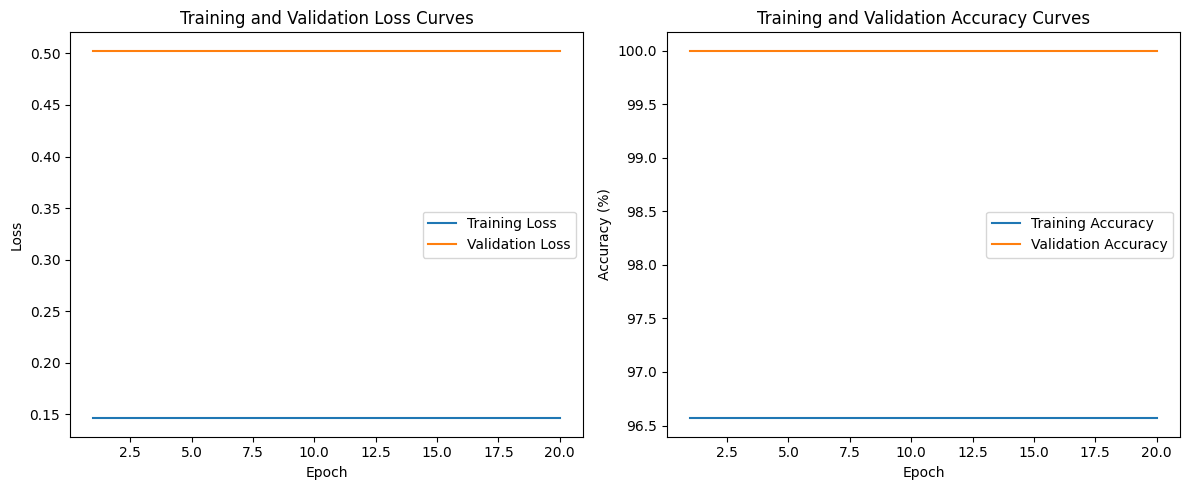

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ...

# Lists to store training loss and validation accuracy
train_loss_history = []
valid_loss_history = []
val_accuracy_history = []
train_accuracy_history = []
# ...

for epoch in range(num_epochs):
    # ...

    # Append training loss to the list
    train_loss_history.append(running_loss / len(train_loader))
    valid_loss_history.append(running_loss / len(test_loader))

    # Validation loop
    # ...

    # Append validation accuracy to the list
    val_accuracy_history.append(validation_accuracy)
    train_accuracy_history.append(train_accuracy)

    # ...

# Plot both loss curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(1, num_epochs + 1), train_loss_history, label='Training Loss')
plt.plot(np.arange(1, num_epochs + 1), valid_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()

# Plot both accuracy curves
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, num_epochs + 1), train_accuracy_history, label='Training Accuracy')
plt.plot(np.arange(1, num_epochs + 1), val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()


Classification Report:
              precision    recall  f1-score   support

       angry       0.99      1.00      0.99        82
     disgust       0.96      0.99      0.98        80
        fear       1.00      1.00      1.00        80
       happy       0.96      1.00      0.98        80
     neutral       0.96      1.00      0.98        81
         sad       1.00      0.93      0.96        80
    surprise       1.00      0.96      0.98        80

    accuracy                           0.98       563
   macro avg       0.98      0.98      0.98       563
weighted avg       0.98      0.98      0.98       563



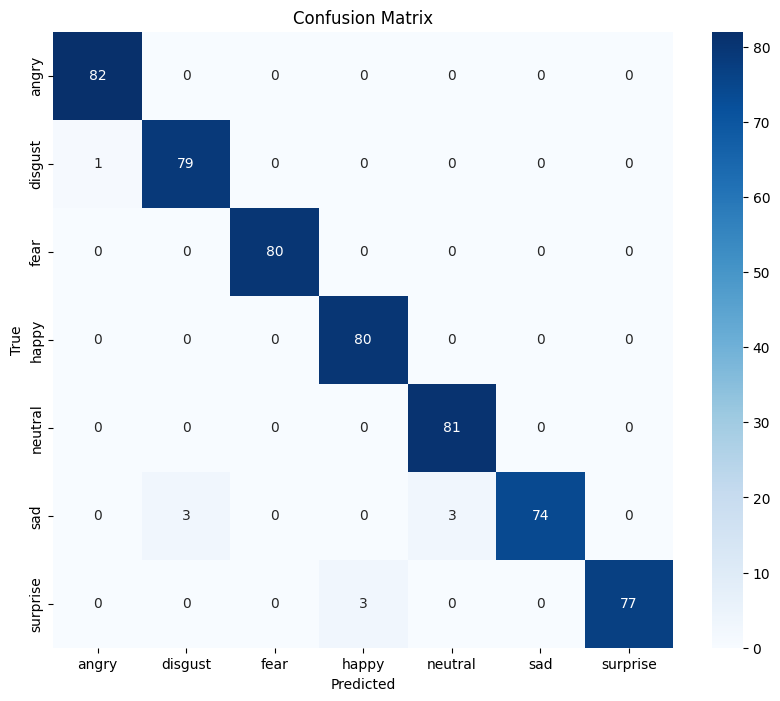

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
# Lists to store predicted and true labels
all_predicted_labels = []
all_true_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.logits, 1)

        # Append predicted and true labels to the lists
        all_predicted_labels.extend(predicted.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Classification report
print("Classification Report:")
print(classification_report(all_true_labels, all_predicted_labels, target_names=test_dataset.classes))

# Confusion matrix
cm = confusion_matrix(all_true_labels, all_predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

with early stopping

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from transformers import ViTFeatureExtractor, ViTForImageClassification

# Define dataset paths
data_dir = "/content/drive/MyDrive/speech emotion/Melspectro"

# Define transformations for data preprocessing and augmentation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create datasets and data loaders
train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=train_transform)
valid_dataset = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=val_test_transform)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=val_test_transform)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Load the pre-trained ViT model
model_name = "google/vit-base-patch16-224-in21k"
feature_extractor = ViTFeatureExtractor(model_name)
model = ViTForImageClassification.from_pretrained(model_name, num_labels=len(train_dataset.classes))

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001)  # Adjust learning rate

# Learning rate scheduler with warm-up
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001, total_steps=len(train_loader) * 20)

# Training loop
num_epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

best_validation_accuracy = 0.0
patience = 5
early_stopping_counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    val_running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        val_running_loss += loss.item()

    # Validation loop
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        validation_accuracy = 100 * correct / total

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total

        # Save the model if validation accuracy improved
        if validation_accuracy > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy
            torch.save(model.state_dict(), "best_model.pth")
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1

        if early_stopping_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    print(f"Epoch [{epoch + 1}/{num_epochs}] "
          f"Validation Loss: {val_running_loss / len(train_loader):.4f} "
        f"Training Loss: {running_loss / len(train_loader):.4f} "

          f"Validation Accuracy: {validation_accuracy:.2f}%"
         f"Training Accuracy: {train_accuracy:.2f}%")

    # Adjust learning rate
    scheduler.step()

# Load the best model for testing
model.load_state_dict(torch.load("best_model.pth"))

# Testing the model
model.eval()
test_correct = 0
test_total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.logits, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100 * test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.2f}%")

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch [1/20] Validation Loss: 0.1951 Training Loss: 1.5789 Validation Accuracy: 64.29%Training Accuracy: 51.67%
Epoch [2/20] Validation Loss: 0.1065 Training Loss: 1.0853 Validation Accuracy: 85.00%Training Accuracy: 72.27%


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-4bfc237940c5>", line 62, in <cell line: 57>
    for inputs, labels in train_loader:
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 631, in __next__
    data = self._next_data()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 675, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/usr/local/lib/python3.10/dist-packages/

TypeError: object of type 'NoneType' has no len()